In [1]:
# Importing required library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
#Remove warnings in kernel while running a cell
import warnings
warnings.filterwarnings('ignore')

In [2]:
session_info.show()

NameError: name 'session_info' is not defined

In [5]:
# Importing application_data.csv and vewing the dataframe

df = pd.read_csv('/Users/avinashsaraswat/Downloads/MS_Upgrad_project/Bike_sharing_linear_regression/day.csv')
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [6]:
df.shape

(730, 16)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [8]:
# as we can see dreday is object but in fact it a date formate converting it into data formate 
df['dteday'] =  pd.to_datetime(df['dteday'],format='%d-%m-%Y')

In [9]:
# checking info after changing
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     730 non-null    int64         
 1   dteday      730 non-null    datetime64[ns]
 2   season      730 non-null    int64         
 3   yr          730 non-null    int64         
 4   mnth        730 non-null    int64         
 5   holiday     730 non-null    int64         
 6   weekday     730 non-null    int64         
 7   workingday  730 non-null    int64         
 8   weathersit  730 non-null    int64         
 9   temp        730 non-null    float64       
 10  atemp       730 non-null    float64       
 11  hum         730 non-null    float64       
 12  windspeed   730 non-null    float64       
 13  casual      730 non-null    int64         
 14  registered  730 non-null    int64         
 15  cnt         730 non-null    int64         
dtypes: datetime64[ns](1), floa

In [10]:
df.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [11]:
#from the given data we can see that instant is an index column so we drop it
df.drop(['instant'],axis=1,inplace=True)

# Checking the various statistics of numaric variables of dataframe
df.describe()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


Visualisation of data

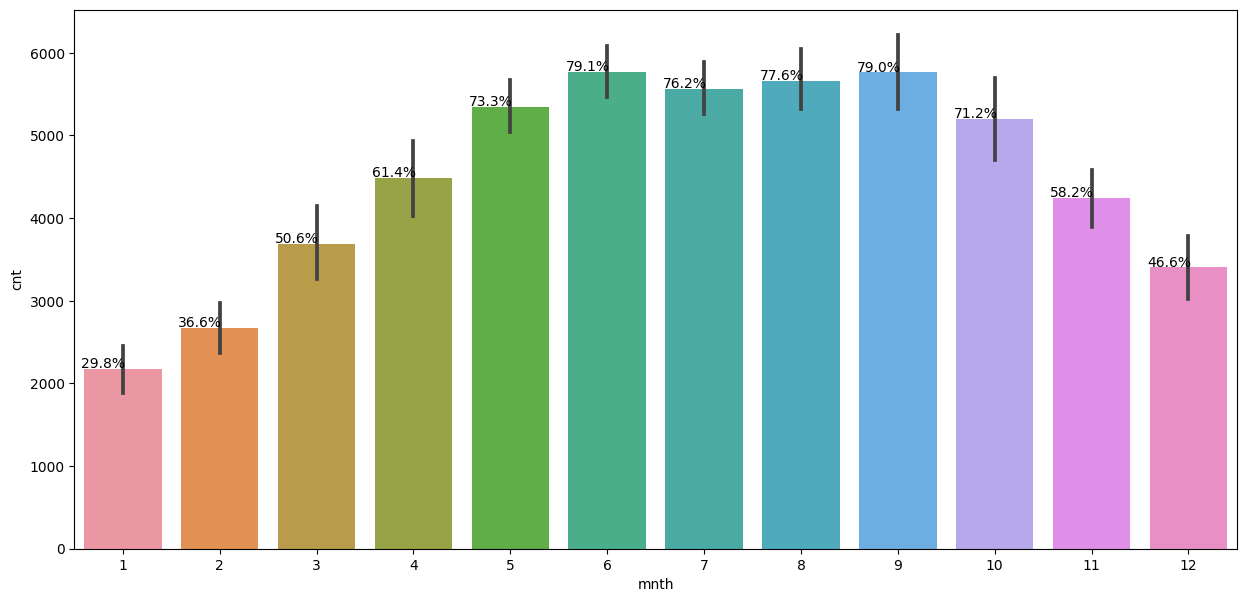

In [12]:
plt.figure(figsize=(15,7))
ax = sns.barplot(x="mnth", y="cnt",data=df)
for p in ax.patches:
        ax.annotate('{:.1f}%'.format((p.get_height()/len(df))*10), 
                    (p.get_x()+0.2, p.get_height()+10), ha='center')

plt.show()

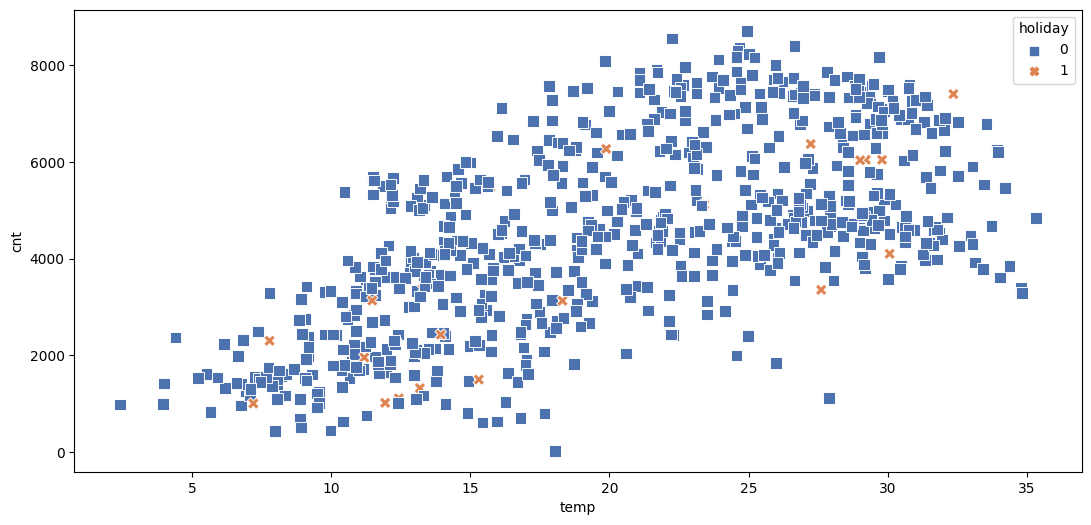

In [13]:
plt.figure(figsize = (13, 6)) 
markers = {1: "X", 0: "s"}
sns.scatterplot(x = 'temp', y = 'cnt', hue = 'holiday',
                style = 'holiday',palette="deep",s=70,
                markers=markers,data = df) 
plt.show()

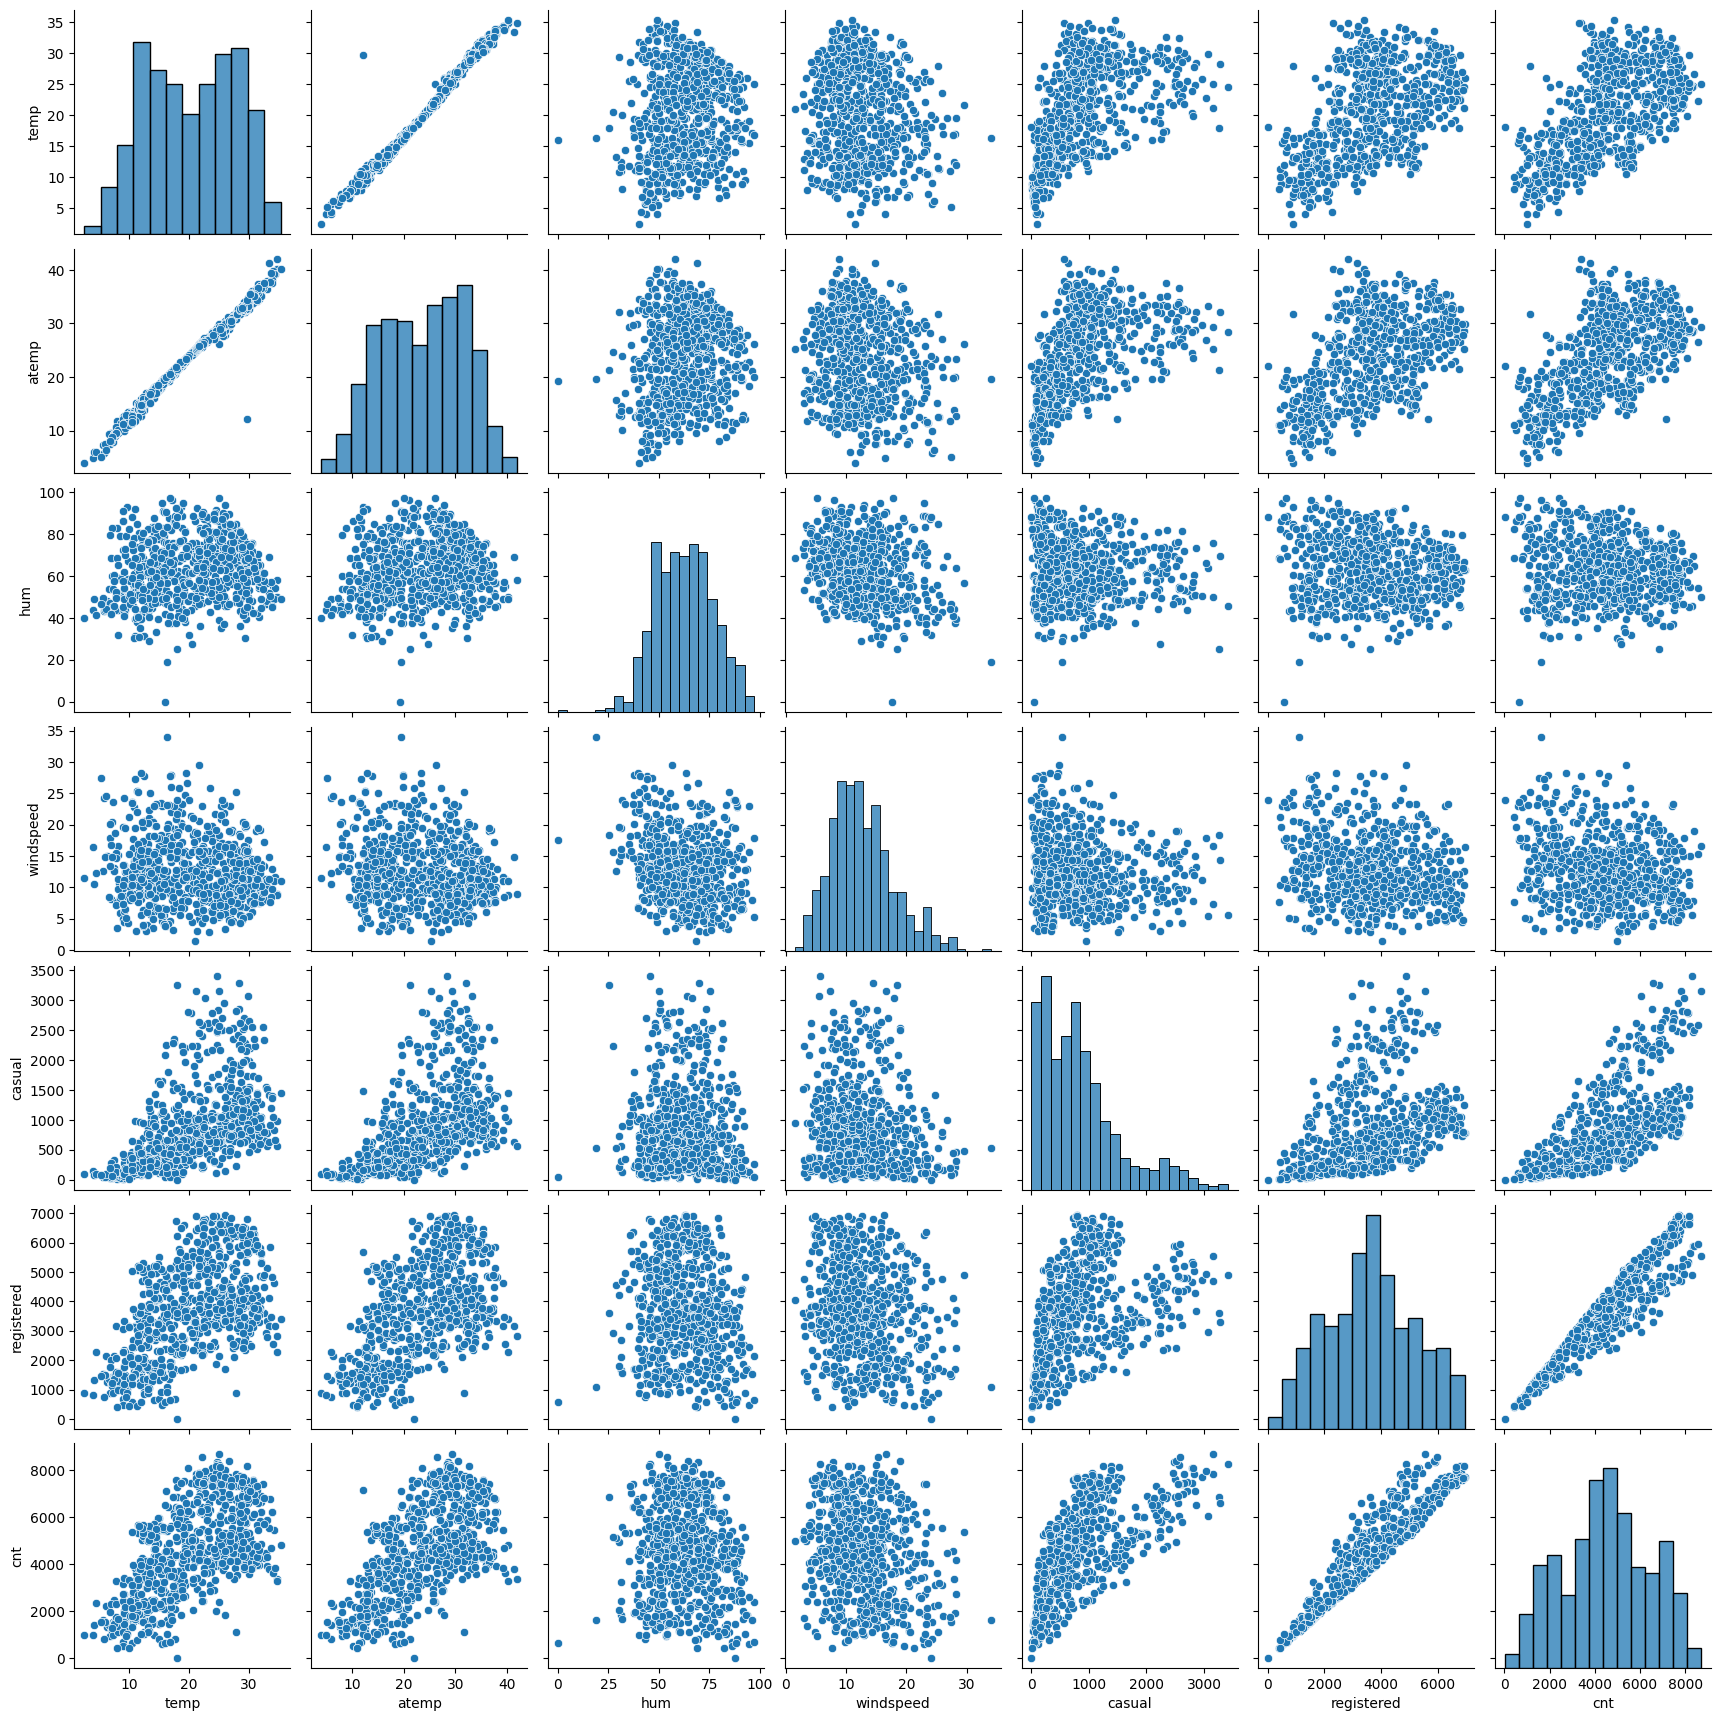

In [14]:
sns.pairplot(df[['temp','atemp','hum','windspeed','casual','registered','cnt']])
plt.show()

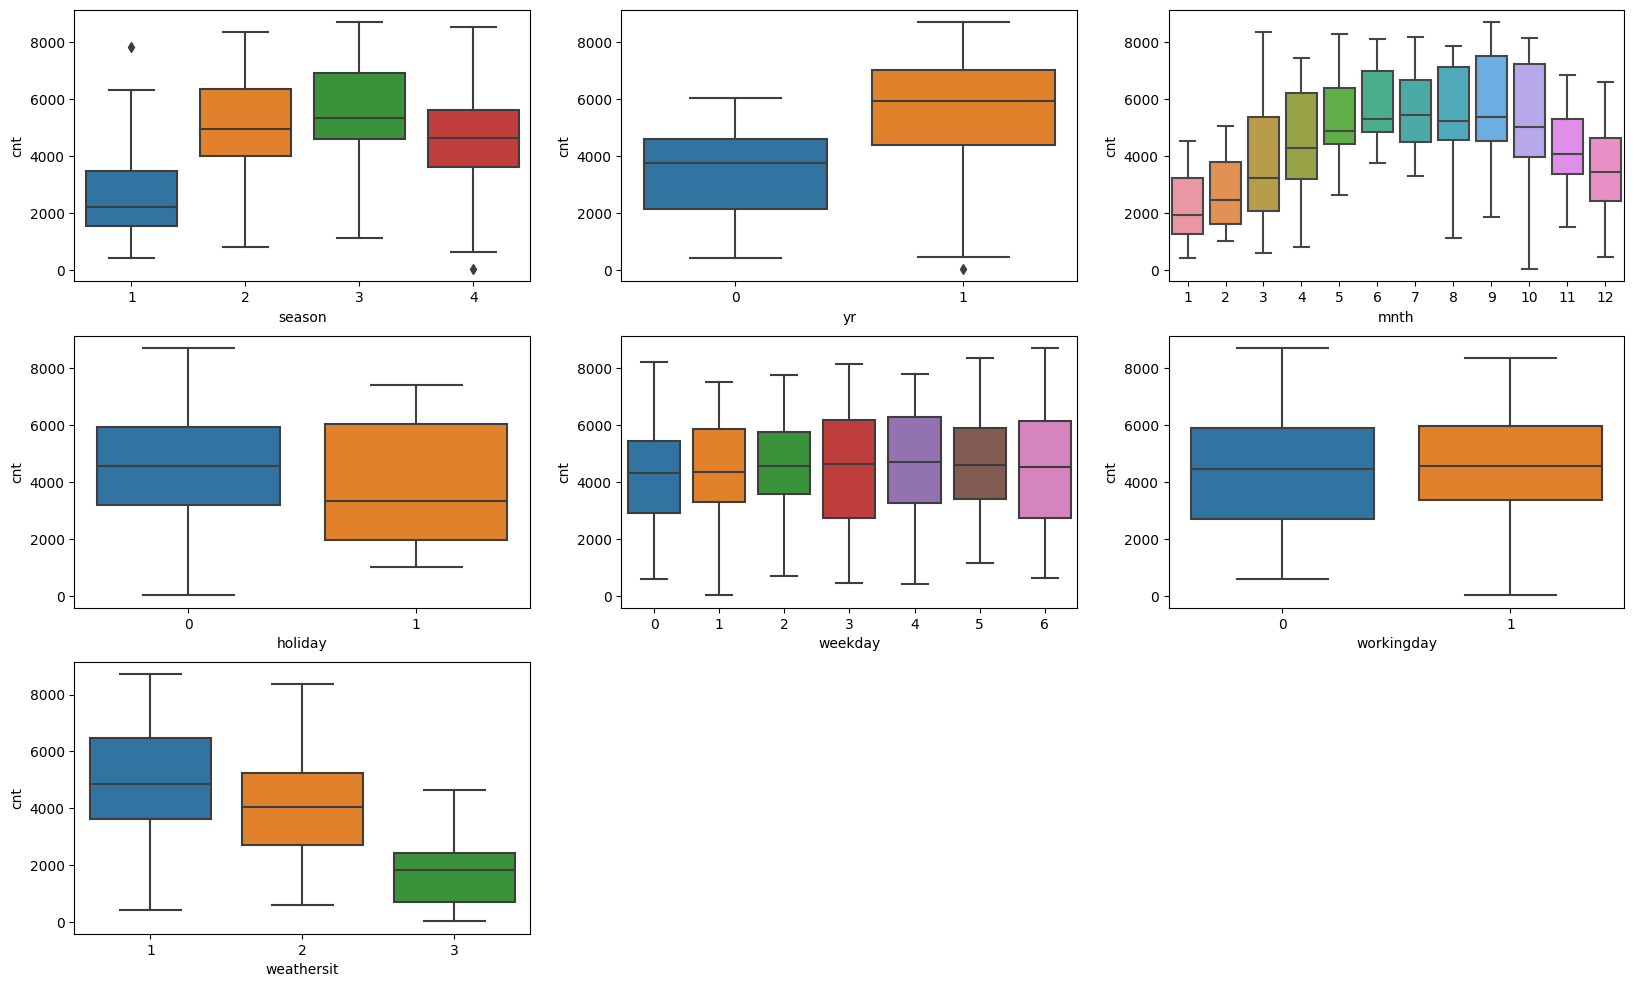

In [15]:
plt.figure(figsize=(20, 12))
plt.subplot(3,3,1)
sns.boxplot(x = 'season', y = 'cnt', data = df)
plt.subplot(3,3,2)
sns.boxplot(x = 'yr', y = 'cnt', data = df)
plt.subplot(3,3,3)
sns.boxplot(x = 'mnth', y = 'cnt', data = df)
plt.subplot(3,3,4)
sns.boxplot(x = 'holiday', y = 'cnt', data = df)
plt.subplot(3,3,5)
sns.boxplot(x = 'weekday', y = 'cnt', data = df)
plt.subplot(3,3,6)
sns.boxplot(x = 'workingday', y = 'cnt', data = df)
plt.subplot(3,3,7)
sns.boxplot(x = 'weathersit', y = 'cnt', data = df)
plt.show()

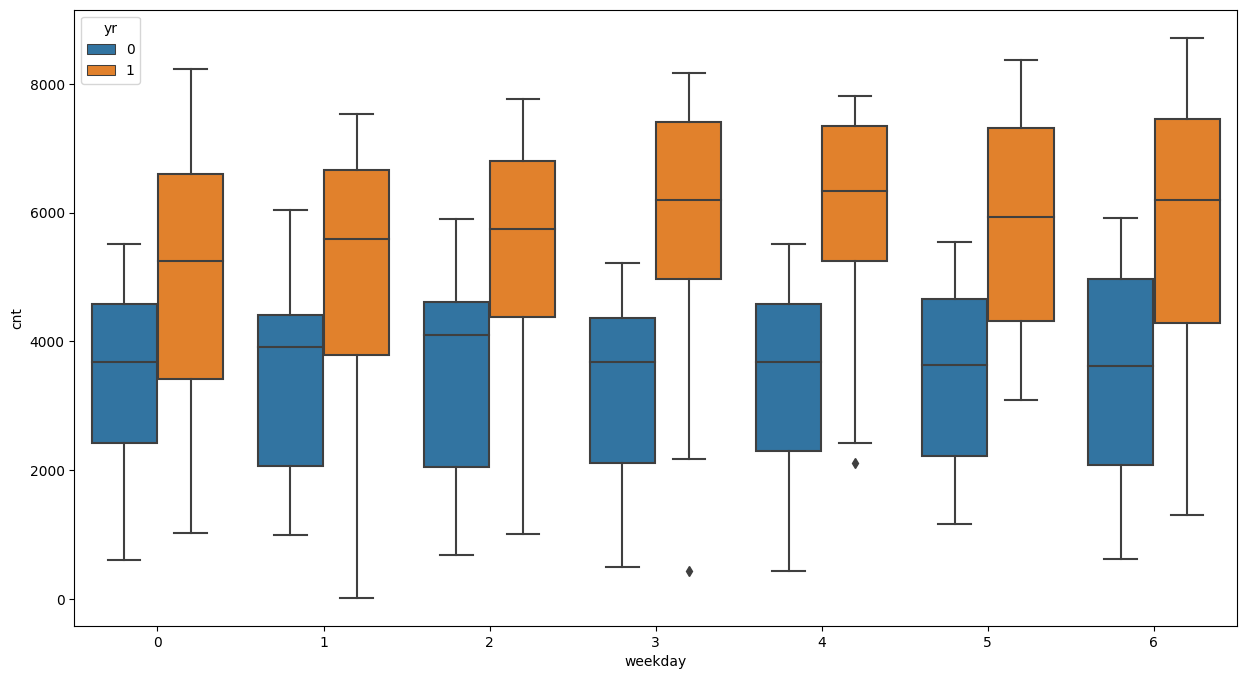

In [16]:
plt.figure(figsize = (15, 8))
sns.boxplot(x = 'weekday', y = 'cnt', hue = 'yr', data = df)
plt.show()

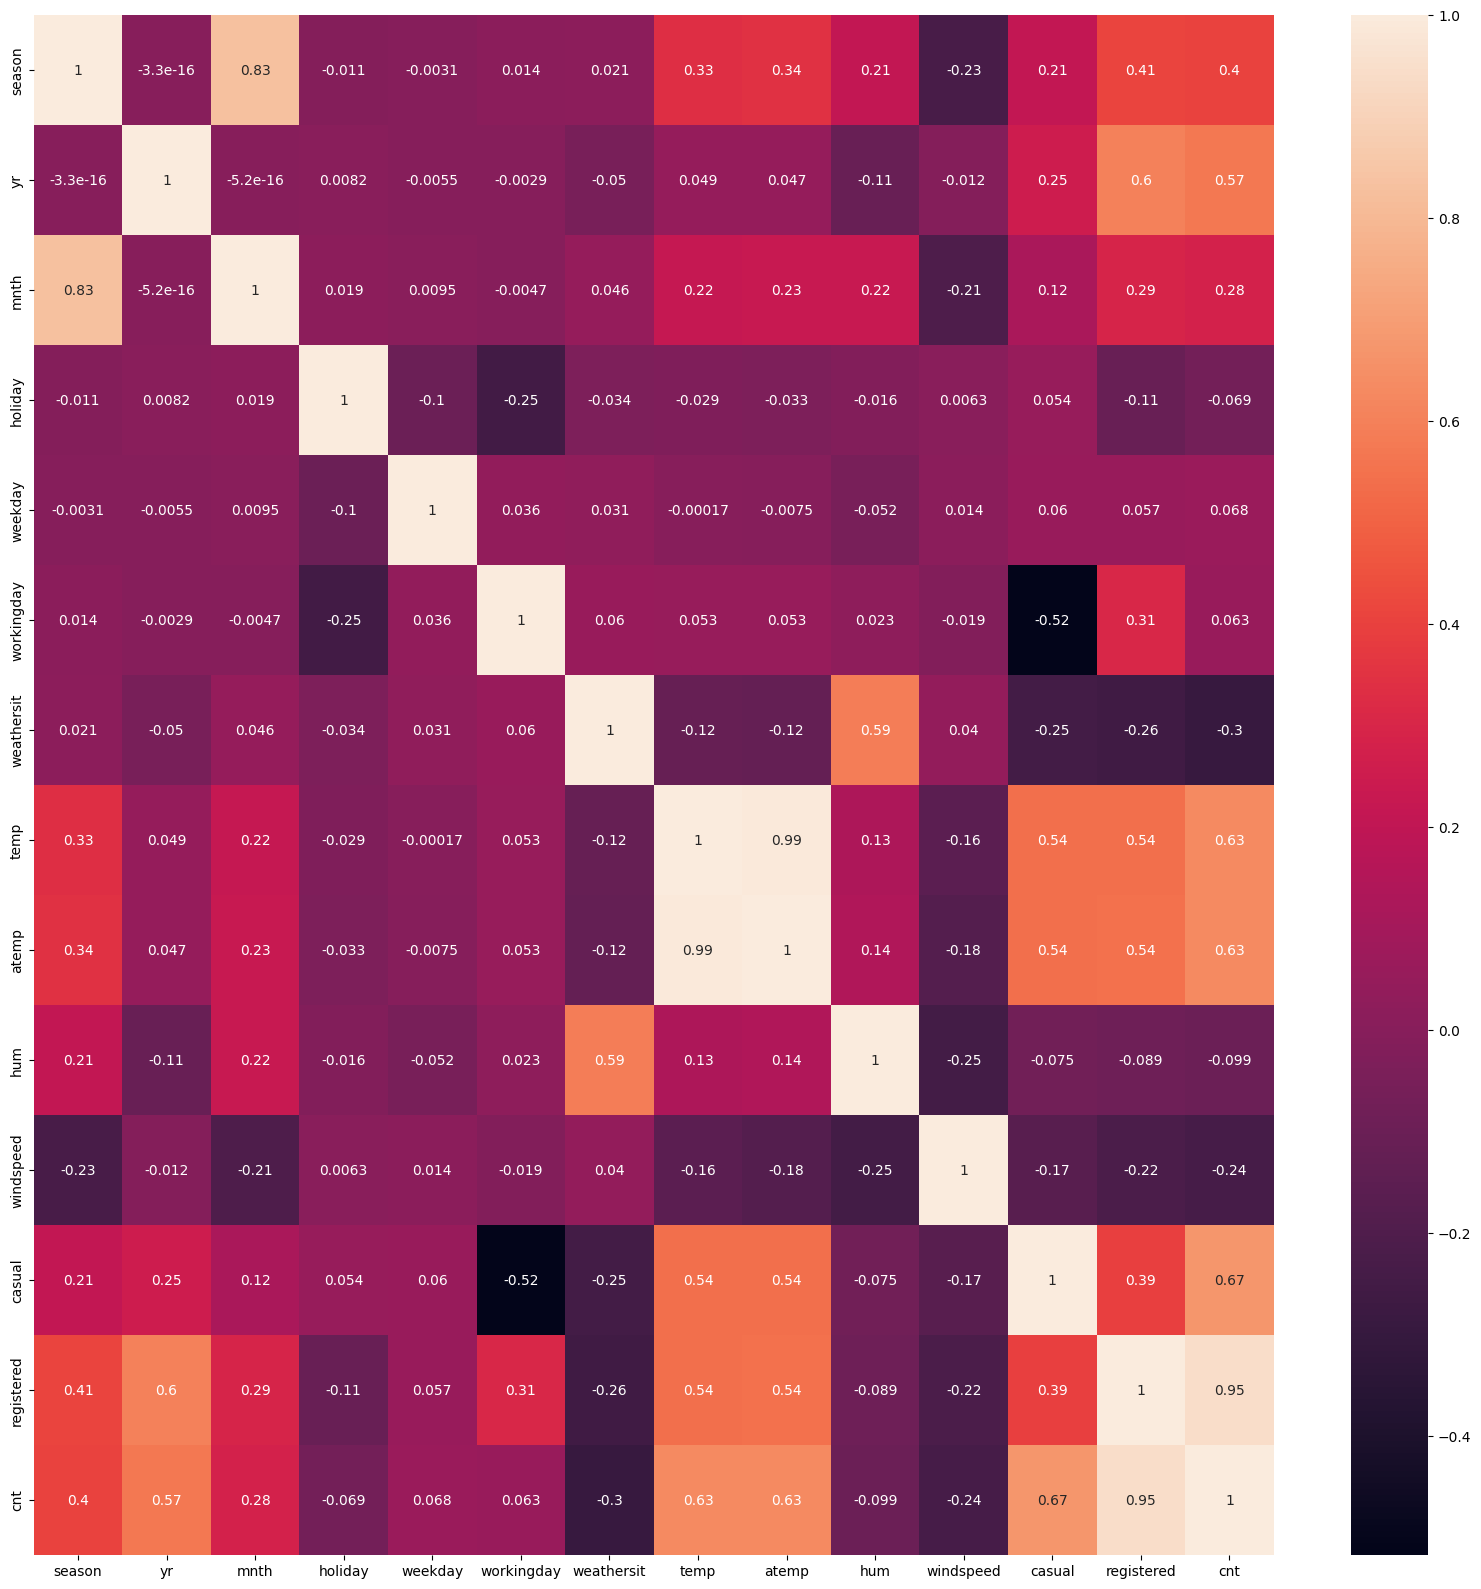

In [17]:
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(),annot=True,)
plt.show()

In [18]:
#we can see column atemp having same temp data so we can drop atemp to avoid confusion
# and a temp and atemp are highly corelated and it reperesent same outcome so droping one column 
df.drop(['atemp'],axis=1,inplace=True)

#we can see column dteday and yr month are having same data so we can drop dteday to avoid confusion
df.drop(['dteday'],axis=1,inplace=True)

df.drop(['casual','registered',],axis=1,inplace=True)

In [19]:
# as we can see season,weekday,mnth and weathersit is a catogorical and it has specfic representation 
df['season'] = df['season'].map({1:'spring', 2:'summer', 3:'fall', 4:'winter'})

df['weekday'] = df['weekday'].map({0:"Sunday",1:"Monday",2:"Tuesday",3:"Wednesday",
                                                     4:"Thursday",5:"Friday",6:"Saturday"})

df['weathersit'] = df['weathersit'].map({1:"Clear_Few_Clouds",2:"Mist_cloudy",
                                                           3:"Light_rain_snow_Thunderstorm",
                                                          4:'Heavy Rain_Ice Pallets_Thunderstorm_Mist'})

df['mnth'] = df['mnth'].map({1:'January',2:'February',3:'March',4:'April',5:'May',6:'June',7:'July',
                                               8:'August',9:'September',10:'October',11:'November',12:'December'})

In [20]:
df.season.value_counts()
df.weathersit.value_counts()

Clear_Few_Clouds                463
Mist_cloudy                     246
Light_rain_snow_Thunderstorm     21
Name: weathersit, dtype: int64

In [21]:
# Get the dummy variables for the feature 'mnth' and store it in a new variable - 'Dummy_month'
Dummy_month = pd.get_dummies(df['mnth'],drop_first = True)

# Check what the dataset 'Dummy_month' looks like
Dummy_month.head()

,August,December,February,January,July,June,March,May,November,October,September
0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,0,1,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0,0


In [22]:
# Get the dummy variables for the feature 'season' and store it in a new variable - 'Dummy_season'
Dummy_season = pd.get_dummies(df['season'],drop_first = True)

# Check what the dataset 'Dummy_season' looks like
Dummy_season.head()

,spring,summer,winter
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0


In [23]:
# Get the dummy variables for the feature 'weekday' and store it in a new variable - 'Dummy_weekday'
Dummy_weekday = pd.get_dummies(df['weekday'],drop_first = True)

# Check what the dataset 'Dummy_weekday' looks like
Dummy_weekday.head()

,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
0,0,1,0,0,0,0
1,0,0,1,0,0,0
2,1,0,0,0,0,0
3,0,0,0,0,1,0
4,0,0,0,0,0,1


In [24]:
# Get the dummy variables for the feature 'weathersit' and store it in a new variable - 'Dummy_weathersit'
Dummy_weathersit = pd.get_dummies(df['weathersit'],drop_first = True)

# Check what the dataset 'Dummy_weathersit' looks like
Dummy_weathersit.head()

,Light_rain_snow_Thunderstorm,Mist_cloudy
0,0,1
1,0,1
2,0,0
3,0,0
4,0,0


In [25]:
df_bike_final = pd.concat([df,Dummy_month,Dummy_season,Dummy_weekday,Dummy_weathersit],axis=1)

In [26]:
# Dropping the columns
df_bike_final = df_bike_final.drop(['season','mnth','weekday','weathersit'],axis=1)

# after dropping checking the head()
df_bike_final.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,August,December,February,...,summer,winter,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Light_rain_snow_Thunderstorm,Mist_cloudy
0,0,0,0,14.110847,80.5833,10.749882,985,0,0,0,...,0,0,0,1,0,0,0,0,0,1
1,0,0,0,14.902598,69.6087,16.652113,801,0,0,0,...,0,0,0,0,1,0,0,0,0,1
2,0,0,1,8.050924,43.7273,16.636703,1349,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,0,0,1,8.200000,59.0435,10.739832,1562,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,0,0,1,9.305237,43.6957,12.522300,1600,0,0,0,...,0,0,0,0,0,0,0,1,0,0


Splitting the Data into Training and Testing Sets

In [27]:
# importing necessary library 
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error


import statsmodels.api as sm


from statsmodels.stats.outliers_influence import variance_inflation_factor


# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [29]:
# We specify this so that the train and test data set always have the same rows, respectively
np.random.seed(0)
df_train, df_test = train_test_split(df_bike_final, train_size = 0.8, test_size = 0.2, random_state = 100)

In [30]:
# printing the shape of test and train data set
print(df_train.shape)
print(df_test.shape)

(584, 29)
(146, 29)


In [31]:
# 1. Instantiate an object
scaler = MinMaxScaler()

In [32]:
# Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables
num_vars = ['cnt', 'temp', 'hum','windspeed']

df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

df_train.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,August,December,February,...,summer,winter,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Light_rain_snow_Thunderstorm,Mist_cloudy
367,1,0,1,0.113228,0.454701,0.695175,0.254717,0,0,0,...,0,0,0,0,0,0,1,0,0,0
648,1,0,1,0.468352,0.477458,0.299450,0.868385,0,0,0,...,0,1,0,0,0,1,0,0,0,0
44,0,0,1,0.443431,0.387290,0.807474,0.217556,0,0,1,...,0,0,1,0,0,0,0,0,0,0
705,1,0,1,0.326094,0.787463,0.189819,0.573631,0,1,0,...,0,1,0,0,0,0,0,0,0,1
379,1,0,0,0.133996,0.431945,0.449210,0.263346,0,0,0,...,0,0,0,0,1,0,0,0,0,0


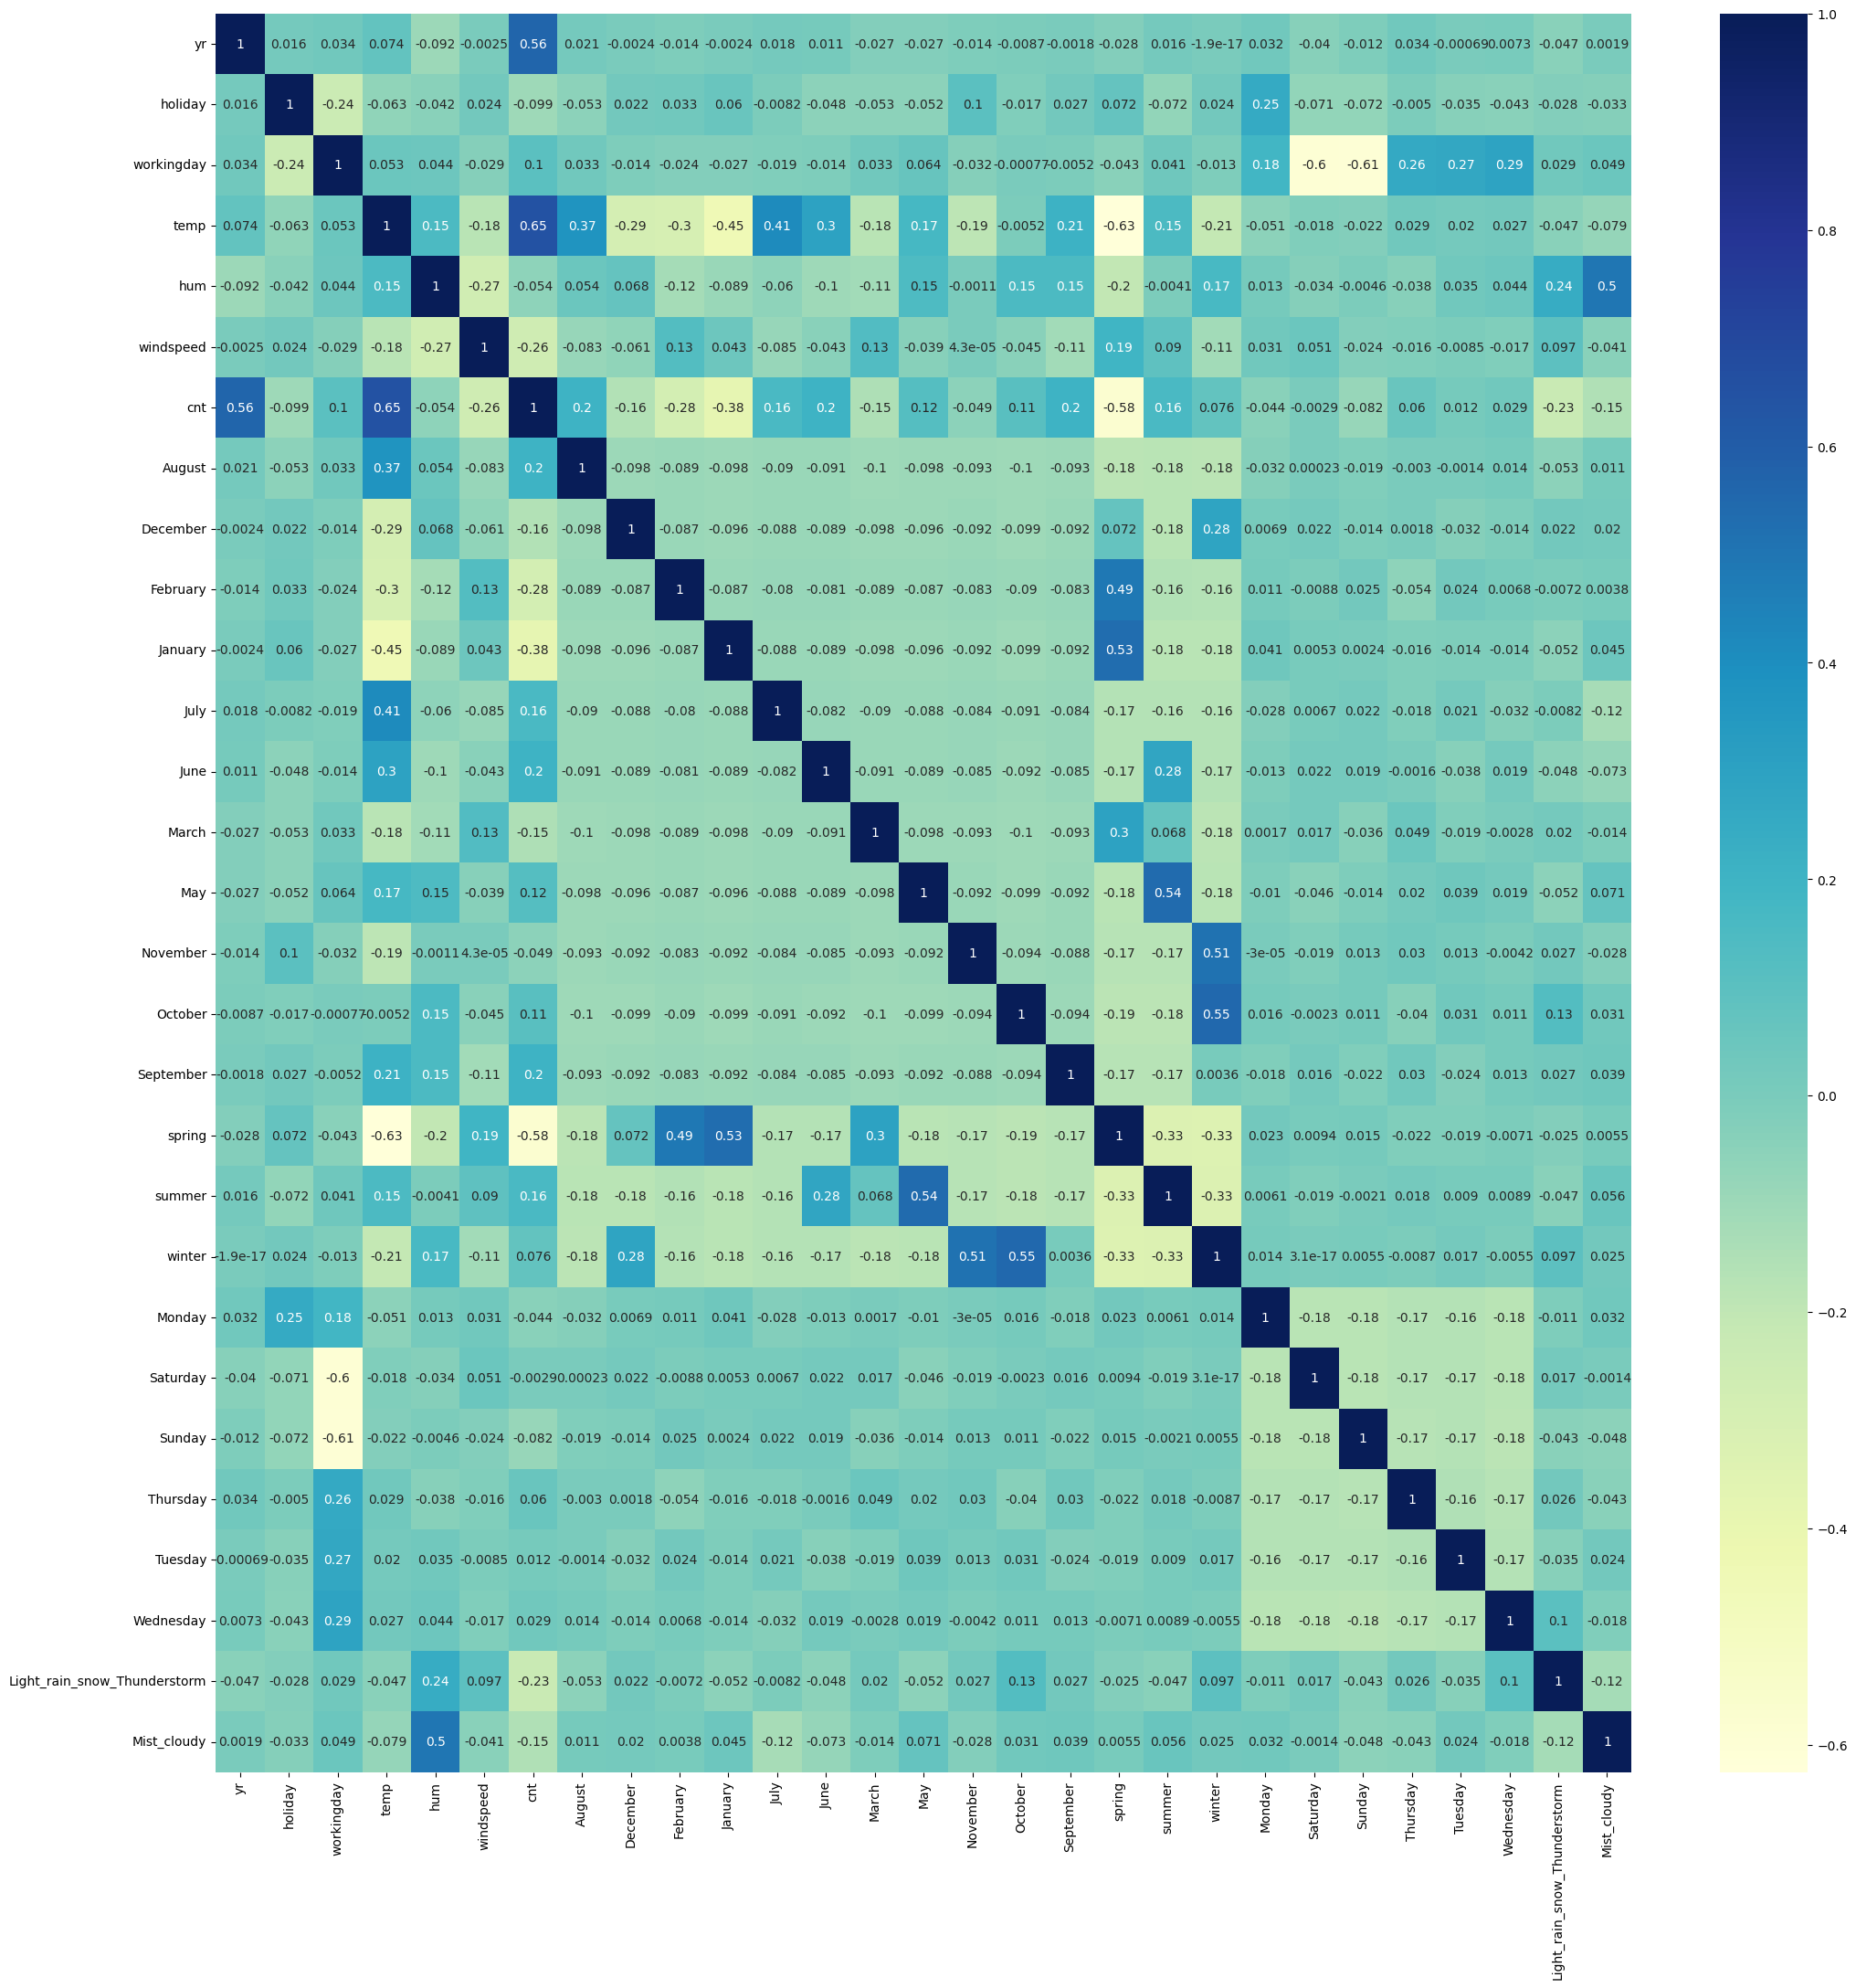

In [33]:
# Let's check the correlation coefficients to see which variables are highly correlated

plt.figure(figsize = (25, 25))
sns.heatmap(df_train.corr(), annot = True, cmap="YlGnBu")
plt.show()

Fit a regression line through the training data using statsmodels. Remember that in statsmodels, we need to explicitly fit a constant using sm.add_constant(X) because if we don't perform this step, statsmodels fits a regression line passing through the origin, by default.

In [34]:
# dividing into y train and x train
y_train = df_train.pop('cnt')
X_train = df_train

In [35]:
#checking the head after splitting
X_train.head()

,yr,holiday,workingday,temp,hum,windspeed,August,December,February,January,...,summer,winter,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Light_rain_snow_Thunderstorm,Mist_cloudy
367,1,0,1,0.113228,0.454701,0.695175,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
648,1,0,1,0.468352,0.477458,0.299450,0,0,0,0,...,0,1,0,0,0,1,0,0,0,0
44,0,0,1,0.443431,0.387290,0.807474,0,0,1,0,...,0,0,1,0,0,0,0,0,0,0
705,1,0,1,0.326094,0.787463,0.189819,0,1,0,0,...,0,1,0,0,0,0,0,0,0,1
379,1,0,0,0.133996,0.431945,0.449210,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0


In [36]:
# Running RFE with the output number of the variable equal to 18
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, step =18)             # running RFE
rfe = rfe.fit(X_train, y_train)

In [37]:
# checking RFE Support for selecting
col = X_train.columns[rfe.support_]
col

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'January',
       'September', 'spring', 'winter', 'Saturday', 'Sunday',
       'Light_rain_snow_Thunderstorm', 'Mist_cloudy'],
      dtype='object')

In [38]:
# negating the col with actual data x train which are not selected 
X_train.columns[~rfe.support_]

Index(['August', 'December', 'February', 'July', 'June', 'March', 'May',
       'November', 'October', 'summer', 'Monday', 'Thursday', 'Tuesday',
       'Wednesday'],
      dtype='object')

In [39]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]


# Adding a constant variable 
import statsmodels.api as sm  

X_train_rfe = sm.add_constant(X_train_rfe)

In [40]:
lm = sm.OLS(y_train,X_train_rfe).fit()   # Running the linear model

#Let's see the summary of our linear model
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     234.9
Date:                Sat, 15 Oct 2022   Prob (F-statistic):          5.46e-219
Time:                        12:54:55   Log-Likelihood:                 582.16
No. Observations:                 584   AIC:                            -1136.
Df Residuals:                     570   BIC:                            -1075.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                            0.2520      0.024     10.339      0.000       0.204       0.300
yr                               0.2295      0.008     30.201      0.000       0.215       0.244
holiday                         -0.0106      0.019     -0.543      0.588      -0.049       0.028
workingday                       0.1023      0.009     11.669      0.000       0.085       0.119
temp                             0.4270      0.028     15.349      0.000       0.372       0.482
hum                             -0.1304      0.036     -3.634      0.000      -0.201      -0.060
windspeed                       -0.1666      0.024     -6.880      0.000      -0.214      -0.119
January                         -0.0403      0.016     -2.498      0.013      -0.072      -0.009
September                        0.0666      0.014      4.681      0.000       0.039       0.095
spring                          -0.1096      0.014     -7.606      0.000      -0.138      -0.081
winter                           0.0564      0.012      4.880      0.000       0.034       0.079
Saturday                         0.1099      0.011     10.151      0.000       0.089       0.131
Sunday                           0.0503      0.011      4.618      0.000       0.029       0.072
Light_rain_snow_Thunderstorm    -0.2653      0.026    -10.385      0.000      -0.315      -0.215
Mist_cloudy                     -0.0557      0.010     -5.595      0.000      -0.075      -0.036
==============================================================================
Omnibus:                       86.625   Durbin-Watson:                   2.077
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              220.250
Skew:                          -0.762   Prob(JB):                     1.49e-48
Kurtosis:                       5.595   Cond. No.                     1.22e+15
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.13e-27. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [41]:
# Droping the const for calculating vif
X_train_new = X_train_rfe.drop(["const"], axis = 1)

In [43]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,workingday,43.06
11,Sunday,10.72
10,Saturday,10.35
3,temp,2.80
8,spring,2.79
1,holiday,2.78
4,hum,1.91
9,winter,1.79
13,Mist_cloudy,1.60
6,January,1.49


In [44]:
X_train_new.head()

,yr,holiday,workingday,temp,hum,windspeed,January,September,spring,winter,Saturday,Sunday,Light_rain_snow_Thunderstorm,Mist_cloudy
367,1,0,1,0.113228,0.454701,0.695175,1,0,1,0,0,0,0,0
648,1,0,1,0.468352,0.477458,0.299450,0,0,0,1,0,0,0,0
44,0,0,1,0.443431,0.387290,0.807474,0,0,1,0,0,0,0,0
705,1,0,1,0.326094,0.787463,0.189819,0,0,0,1,0,0,0,1
379,1,0,0,0.133996,0.431945,0.449210,1,0,1,0,0,1,0,0


In [45]:
# Adding a constant variable 

X_train_new = sm.add_constant(X_train_new)

lm_2 = sm.OLS(y_train,X_train_new).fit()   # Running the linear model

#Let's see the summary of our linear model
lm_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     234.9
Date:                Sat, 15 Oct 2022   Prob (F-statistic):          5.46e-219
Time:                        12:55:10   Log-Likelihood:                 582.16
No. Observations:                 584   AIC:                            -1136.
Df Residuals:                     570   BIC:                            -1075.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                            0.2520      0.024     10.339      0.000       0.204       0.300
yr                               0.2295      0.008     30.201      0.000       0.215       0.244
holiday                         -0.0106      0.019     -0.543      0.588      -0.049       0.028
workingday                       0.1023      0.009     11.669      0.000       0.085       0.119
temp                             0.4270      0.028     15.349      0.000       0.372       0.482
hum                             -0.1304      0.036     -3.634      0.000      -0.201      -0.060
windspeed                       -0.1666      0.024     -6.880      0.000      -0.214      -0.119
January                         -0.0403      0.016     -2.498      0.013      -0.072      -0.009
September                        0.0666      0.014      4.681      0.000       0.039       0.095
spring                          -0.1096      0.014     -7.606      0.000      -0.138      -0.081
winter                           0.0564      0.012      4.880      0.000       0.034       0.079
Saturday                         0.1099      0.011     10.151      0.000       0.089       0.131
Sunday                           0.0503      0.011      4.618      0.000       0.029       0.072
Light_rain_snow_Thunderstorm    -0.2653      0.026    -10.385      0.000      -0.315      -0.215
Mist_cloudy                     -0.0557      0.010     -5.595      0.000      -0.075      -0.036
==============================================================================
Omnibus:                       86.625   Durbin-Watson:                   2.077
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              220.250
Skew:                          -0.762   Prob(JB):                     1.49e-48
Kurtosis:                       5.595   Cond. No.                     1.22e+15
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.13e-27. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [46]:
# Droping the const for calculating vif
X_train_new = X_train_new.drop(["const"], axis = 1)

In [47]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,workingday,43.06
11,Sunday,10.72
10,Saturday,10.35
3,temp,2.80
8,spring,2.79
1,holiday,2.78
4,hum,1.91
9,winter,1.79
13,Mist_cloudy,1.60
6,January,1.49


In [48]:
# as we can see workingday is having high VIF value so we are dropping it
X_train_new = X_train_new.drop(["workingday"], axis = 1)

In [49]:
# Adding a constant variable 

X_train_new = sm.add_constant(X_train_new)

lm_3 = sm.OLS(y_train,X_train_new).fit()   # Running the linear model

#Let's see the summary of our linear model
lm_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     234.9
Date:                Sat, 15 Oct 2022   Prob (F-statistic):          5.46e-219
Time:                        12:55:39   Log-Likelihood:                 582.16
No. Observations:                 584   AIC:                            -1136.
Df Residuals:                     570   BIC:                            -1075.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                            0.3542      0.030     11.794      0.000       0.295       0.413
yr                               0.2295      0.008     30.201      0.000       0.215       0.244
holiday                         -0.1128      0.023     -4.856      0.000      -0.158      -0.067
temp                             0.4270      0.028     15.349      0.000       0.372       0.482
hum                             -0.1304      0.036     -3.634      0.000      -0.201      -0.060
windspeed                       -0.1666      0.024     -6.880      0.000      -0.214      -0.119
January                         -0.0403      0.016     -2.498      0.013      -0.072      -0.009
September                        0.0666      0.014      4.681      0.000       0.039       0.095
spring                          -0.1096      0.014     -7.606      0.000      -0.138      -0.081
winter                           0.0564      0.012      4.880      0.000       0.034       0.079
Saturday                         0.0077      0.011      0.717      0.474      -0.013       0.029
Sunday                          -0.0519      0.011     -4.890      0.000      -0.073      -0.031
Light_rain_snow_Thunderstorm    -0.2653      0.026    -10.385      0.000      -0.315      -0.215
Mist_cloudy                     -0.0557      0.010     -5.595      0.000      -0.075      -0.036
==============================================================================
Omnibus:                       86.625   Durbin-Watson:                   2.077
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              220.250
Skew:                          -0.762   Prob(JB):                     1.49e-48
Kurtosis:                       5.595   Cond. No.                         19.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [50]:
# Droping the const for calculating vif
X_train_new = X_train_new.drop(["const"], axis = 1)

In [51]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,hum,23.03
2,temp,13.79
4,windspeed,4.09
7,spring,2.97
12,Mist_cloudy,2.27
8,winter,2.09
0,yr,2.07
5,January,1.60
10,Sunday,1.24
9,Saturday,1.22


In [52]:
X_train_new.head()

,yr,holiday,temp,hum,windspeed,January,September,spring,winter,Saturday,Sunday,Light_rain_snow_Thunderstorm,Mist_cloudy
367,1,0,0.113228,0.454701,0.695175,1,0,1,0,0,0,0,0
648,1,0,0.468352,0.477458,0.299450,0,0,0,1,0,0,0,0
44,0,0,0.443431,0.387290,0.807474,0,0,1,0,0,0,0,0
705,1,0,0.326094,0.787463,0.189819,0,0,0,1,0,0,0,1
379,1,0,0.133996,0.431945,0.449210,1,0,1,0,0,1,0,0


In [53]:
# Adding a constant variable 

X_train_new = sm.add_constant(X_train_new)

lm_4 = sm.OLS(y_train,X_train_new).fit()   # Running the linear model

#Let's see the summary of our linear model
lm_4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     234.9
Date:                Sat, 15 Oct 2022   Prob (F-statistic):          5.46e-219
Time:                        12:56:00   Log-Likelihood:                 582.16
No. Observations:                 584   AIC:                            -1136.
Df Residuals:                     570   BIC:                            -1075.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                            0.3542      0.030     11.794      0.000       0.295       0.413
yr                               0.2295      0.008     30.201      0.000       0.215       0.244
holiday                         -0.1128      0.023     -4.856      0.000      -0.158      -0.067
temp                             0.4270      0.028     15.349      0.000       0.372       0.482
hum                             -0.1304      0.036     -3.634      0.000      -0.201      -0.060
windspeed                       -0.1666      0.024     -6.880      0.000      -0.214      -0.119
January                         -0.0403      0.016     -2.498      0.013      -0.072      -0.009
September                        0.0666      0.014      4.681      0.000       0.039       0.095
spring                          -0.1096      0.014     -7.606      0.000      -0.138      -0.081
winter                           0.0564      0.012      4.880      0.000       0.034       0.079
Saturday                         0.0077      0.011      0.717      0.474      -0.013       0.029
Sunday                          -0.0519      0.011     -4.890      0.000      -0.073      -0.031
Light_rain_snow_Thunderstorm    -0.2653      0.026    -10.385      0.000      -0.315      -0.215
Mist_cloudy                     -0.0557      0.010     -5.595      0.000      -0.075      -0.036
==============================================================================
Omnibus:                       86.625   Durbin-Watson:                   2.077
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              220.250
Skew:                          -0.762   Prob(JB):                     1.49e-48
Kurtosis:                       5.595   Cond. No.                         19.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [54]:
# Droping the const for calculating vif
X_train_new = X_train_new.drop(["const"], axis = 1)

In [55]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,hum,23.03
2,temp,13.79
4,windspeed,4.09
7,spring,2.97
12,Mist_cloudy,2.27
8,winter,2.09
0,yr,2.07
5,January,1.60
10,Sunday,1.24
9,Saturday,1.22


In [60]:
# as we can see hum is having high VIF value so we are dropping it
X_train_new = X_train_new.drop(["hum"], axis = 1)

In [61]:
# Adding a constant variable 

X_train_new = sm.add_constant(X_train_new)

lm_7 = sm.OLS(y_train,X_train_new).fit()   # Running the linear model

#Let's see the summary of our linear model
lm_7.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.839
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Least Squares   F-statistic:                     248.1
Date:                Sat, 15 Oct 2022   Prob (F-statistic):          2.26e-217
Time:                        12:57:53   Log-Likelihood:                 575.48
No. Observations:                 584   AIC:                            -1125.
Df Residuals:                     571   BIC:                            -1068.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                            0.2823      0.023     12.366      0.000       0.237       0.327
yr                               0.2331      0.008     30.621      0.000       0.218       0.248
holiday                         -0.1124      0.023     -4.789      0.000      -0.159      -0.066
temp                             0.4064      0.028     14.765      0.000       0.352       0.460
windspeed                       -0.1425      0.024     -6.054      0.000      -0.189      -0.096
January                         -0.0427      0.016     -2.619      0.009      -0.075      -0.011
September                        0.0624      0.014      4.358      0.000       0.034       0.091
spring                          -0.1115      0.015     -7.661      0.000      -0.140      -0.083
winter                           0.0491      0.012      4.264      0.000       0.026       0.072
Saturday                         0.0089      0.011      0.824      0.410      -0.012       0.030
Sunday                          -0.0535      0.011     -4.986      0.000      -0.075      -0.032
Light_rain_snow_Thunderstorm    -0.3021      0.024    -12.740      0.000      -0.349      -0.255
Mist_cloudy                     -0.0771      0.008     -9.492      0.000      -0.093      -0.061
==============================================================================
Omnibus:                       83.344   Durbin-Watson:                   2.066
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              204.804
Skew:                          -0.745   Prob(JB):                     3.37e-45
Kurtosis:                       5.489   Cond. No.                         14.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [62]:
print(lm_7.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.839
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Least Squares   F-statistic:                     248.1
Date:                Sat, 15 Oct 2022   Prob (F-statistic):          2.26e-217
Time:                        12:57:57   Log-Likelihood:                 575.48
No. Observations:                 584   AIC:                            -1125.
Df Residuals:                     571   BIC:                            -1068.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

In [63]:
X_train_new = X_train_new.drop(["const"], axis = 1)

In [64]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,windspeed,4.06
2,temp,3.97
6,spring,2.24
0,yr,2.06
4,January,1.55
11,Mist_cloudy,1.50
7,winter,1.38
8,Saturday,1.22
9,Sunday,1.22
5,September,1.16


In [65]:
# adding constant for x train variable
X_train_new = sm.add_constant(X_train_new)

In [66]:
# Calculating the y train predict values
y_train_cnt_pre = lm_7.predict(X_train_new)

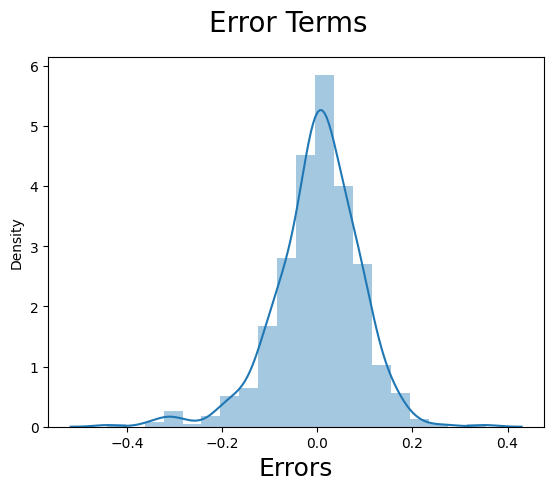

In [67]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_cnt_pre), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label
plt.show()

In [68]:
residuals = y_train.values-y_train_cnt_pre
mean_residuals = round(np.mean(residuals))
print("Mean_Residuals {}".format(mean_residuals))

Mean_Residuals 0


Text(0.5, 0, 'Errors')

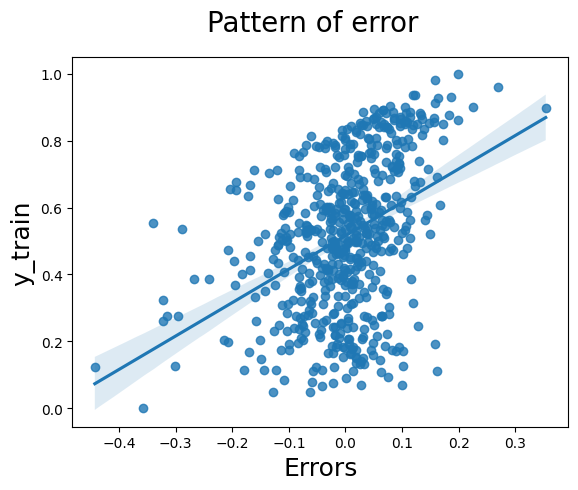

In [69]:
fig = plt.figure()
sns.regplot(x = (y_train - y_train_cnt_pre), y = y_train)
fig.suptitle('Pattern of error', fontsize = 20)                  # Plot heading 
plt.ylabel('y_train', fontsize = 18) 
plt.xlabel('Errors', fontsize = 18)

Text(0.5, 0, 'Errors')

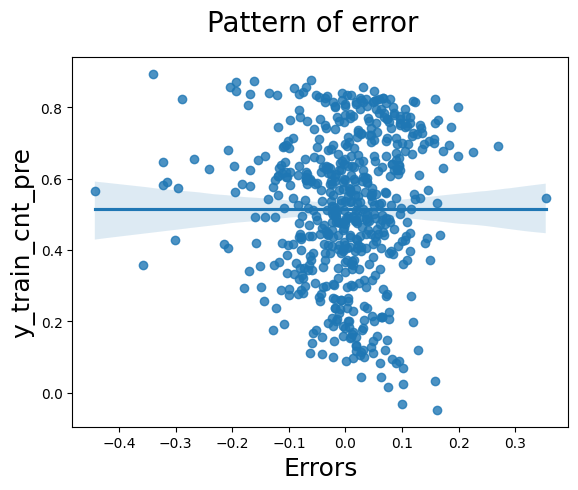

In [70]:
fig = plt.figure()
sns.regplot(x = (y_train - y_train_cnt_pre), y = y_train_cnt_pre)
fig.suptitle('Pattern of error', fontsize = 20)                  # Plot heading 
plt.ylabel('y_train_cnt_pre', fontsize = 18) 
plt.xlabel('Errors', fontsize = 18)

Now that we have fitted the model and checked the normality of error terms, it's time to go ahead and make predictions using the final, i.e. fourth model.

In [71]:
# Scalling the numerical values
num_vars_1 = ['cnt','temp', 'hum', 'windspeed']

df_test[num_vars_1] = scaler.transform(df_test[num_vars_1])

In [72]:
y_test = df_test.pop('cnt')
X_test = df_test

In [73]:
# Now let's use our model to make predictions.

# Creating X_test_new dataframe by dropping variables from X_test
X_train_new.drop('const',axis=1,inplace=True)
X_test_new = X_test[X_train_new.columns]

# Adding a constant variable 
X_test_new = sm.add_constant(X_test_new)



# Making predictions
y_pred1 = lm_7.predict(X_test_new)

Text(0, 0.5, 'y_pred')

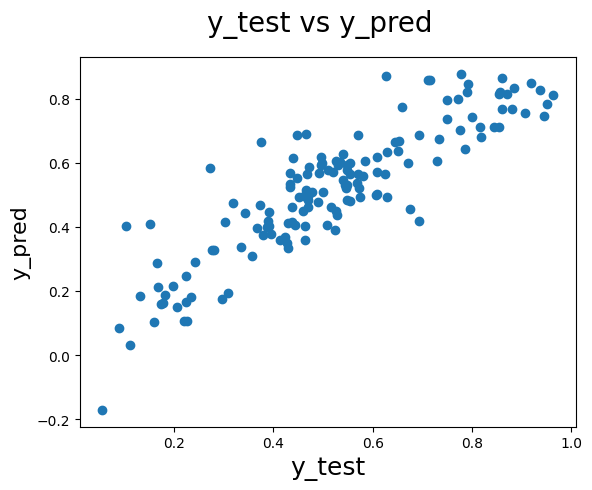

In [74]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred1)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16) 

In [75]:
#Returns the mean squared error; we'll take a square root
np.sqrt(mean_squared_error(y_test, y_pred1))*100

10.28466879262303

In [76]:
#Calculate the r square for test

r_squared = r2_score(y_true=y_test, y_pred = y_pred1)
r_squared*100

76.47129510878025

In [77]:
# adjusted r squre for test

adj_r_squared_train = 0.8303

r = X_test.shape[0]
c = X_test.shape[1]
adj_r_squared_test = 1-(((1-r_squared)*(r-1))/(r-c-1))
adj_r_squared_test*100

70.84049393823194

In [78]:
r_squared_train = 0.833
# difference between r squared of train and test data
round((r_squared_train-r_squared)*100,2)

6.83

In [79]:
# Adjested r square  diff

round((r_squared_train - adj_r_squared_test),2)*100

12.0